<a href="https://colab.research.google.com/github/Jit562/credit_card_default_pred/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction Capstone Project**



# **Project Summary -**



This project is aimed at predicting the case of customers default payments in Taiwan. From the
perspective of risk management, the result of predictive accuracy of the estimated probability of default
will be more valuable than the binary result of classification - credible or not credible clients.
This dataset contains information on default payments, demographic factors, credit data, history of
payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
We are all aware what is credit card. It is type of payment payment card in which charges are made
against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to
make a purchase, that person's account accrues a balance that must be paid off each month.
Credit card default happens when you have become severely delinquent on your credit card
payments.Missing credit card payments once or twice does not count as a default. A payment default
occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##**Import the dependancy**

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/Dataset/Tech-mind-data/Copy of Copy of default of credit card clients.xls')

In [4]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
column_name = list(data.iloc[0].values)
data.drop(index = data.index[0],axis = 0, inplace = True)
data = data.set_axis(column_name,axis = 1)
data = data.astype(int)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
data.shape

(30000, 25)

## **Exploratory Data Analysis(EDA)**

In [7]:
df = data.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
df['PAY_0'].value_counts()

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


In [9]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


### **Data Cleaning**

In [10]:
df.rename(columns = {'PAY_0':'PAY_1'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### **Chech for Duplicate values**

In [11]:
condition = bool(df.duplicated(subset = 'ID').any())

if condition == True:
  print('Duplicate values are present')
else:
  print('Duplicate values are not present')

Duplicate values are not present


### **Identify Outliears**

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
def Check_outlier(columns,df):
  for i in columns:
    fig = px.box(df,y = i)
    fig.update_layout(height = 500, width = 600)
    fig.show()

In [ ]:
Check_outlier(columns,df)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
data_condation = (df.PAY_1>1) | (df.PAY_2>1) | (df.PAY_3>1) | (df.PAY_4>1) | (df.PAY_5>1) | (df.PAY_6>1)
df.loc[data_condation,'HAS_DEF'] = 1
df.loc[df.HAS_DEF.isna(),'HAS_DEF'] = 0
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0


### **Make id column as Axis**

In [15]:
df.set_index('ID',inplace = True)
df.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1.0


In [16]:
# Create a function for ploting the graph for has deff or not
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(14, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

### **1- Check sex column**

In [17]:
df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


In [18]:
df['SEX'] = df['SEX'].map({1:'Male',2:'Female'}).astype('category')
df['SEX'].value_counts()

,count
SEX,
Female,18112
Male,11888


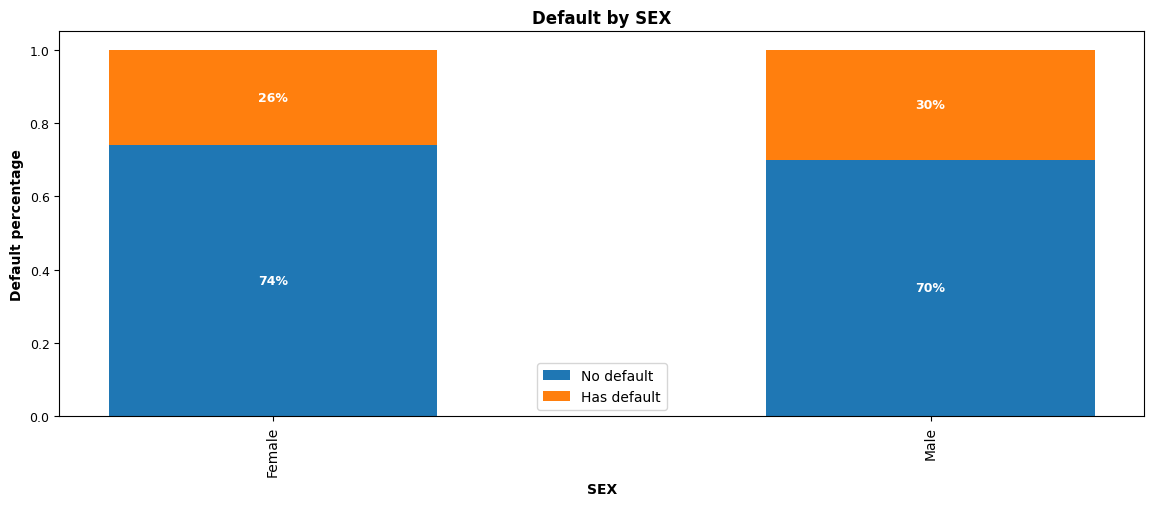

In [ ]:
create_stacked_bar('SEX')

In [19]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [20]:
df['EDUCATION'] = df['EDUCATION'].replace({4:0,5:0,6:0})
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
0,468


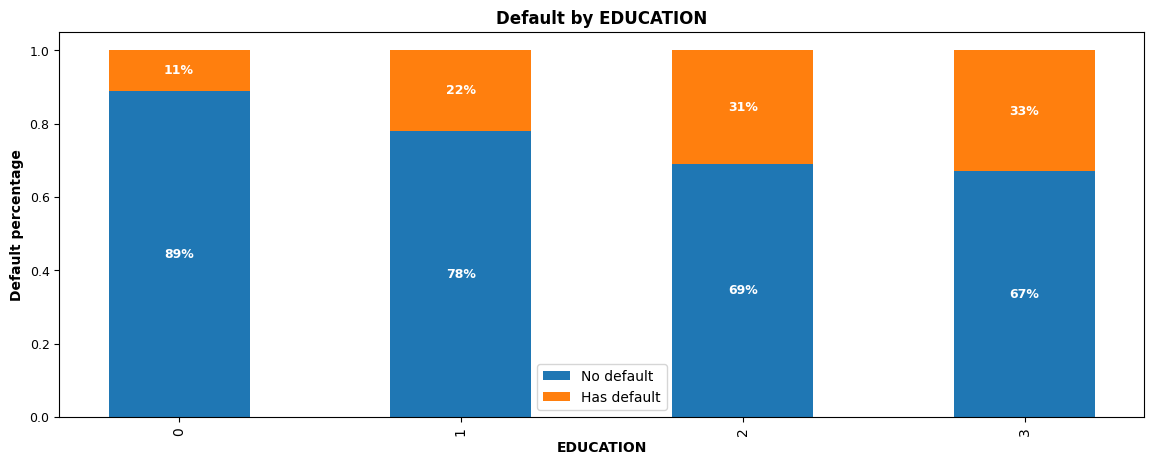

In [ ]:
create_stacked_bar('EDUCATION')

In [21]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [22]:
df['MARRIAGE'] = df['MARRIAGE'].replace({3:0,0:0})
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
0,377


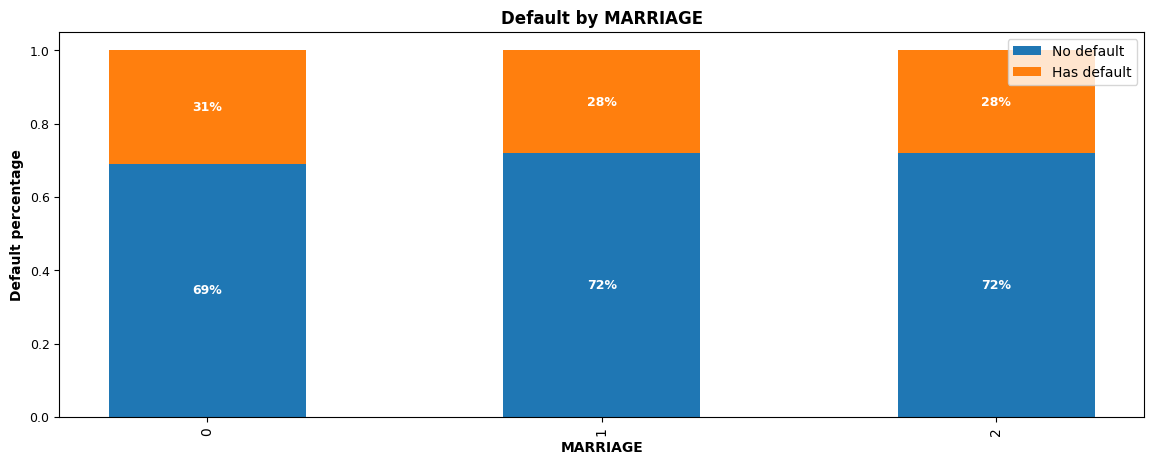

In [ ]:
create_stacked_bar('MARRIAGE')

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'HAS_DEF'],
      dtype='object')

In [23]:
age_def = df.groupby('AGE')['HAS_DEF'].sum().reset_index()
age_def

,AGE,HAS_DEF
0,21,21.0
1,22,251.0
2,23,356.0
3,24,428.0
4,25,398.0
5,26,368.0
6,27,423.0
7,28,398.0
8,29,405.0
9,30,389.0


In [ ]:
px.scatter(age_def,x = 'AGE',y = 'HAS_DEF')

In [ ]:
pay_month = df['PAY_1'].value_counts().reset_index().sort_values(by = 'PAY_1')
pay_month

,PAY_1,count
3,-2,2759
1,-1,5686
0,0,14737
2,1,3688
4,2,2667
5,3,322
6,4,76
7,5,26
9,6,11
10,7,9


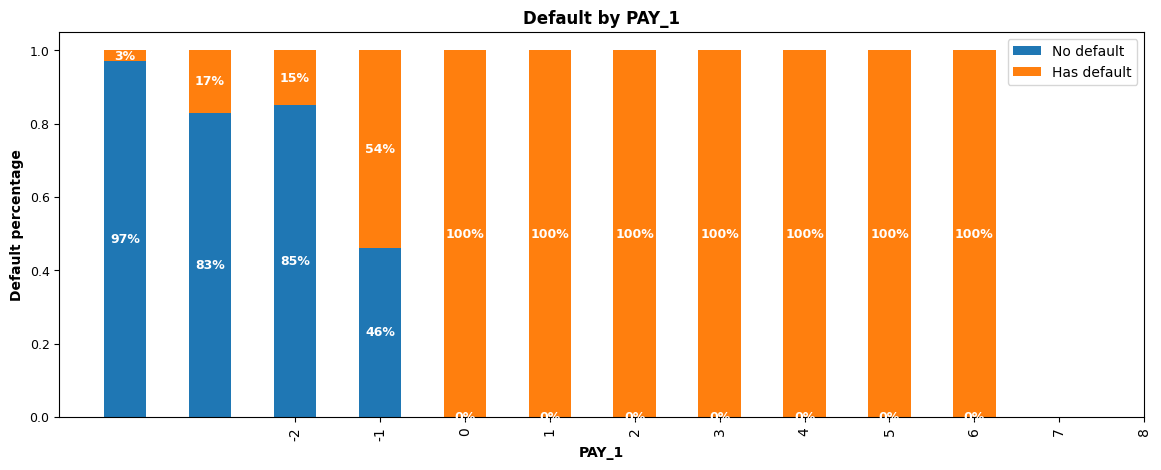

In [ ]:
create_stacked_bar('PAY_1')

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'HAS_DEF'],
      dtype='object')

## Lets Check the change status of the pyment in monts

In [24]:
has_deff = df[df['HAS_DEF'] == 1]
default_trand = has_deff[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis = 0)
default_trand

,0
PAY_1,7918
PAY_2,8608
PAY_3,8169
PAY_4,6578
PAY_5,5268
PAY_6,5196


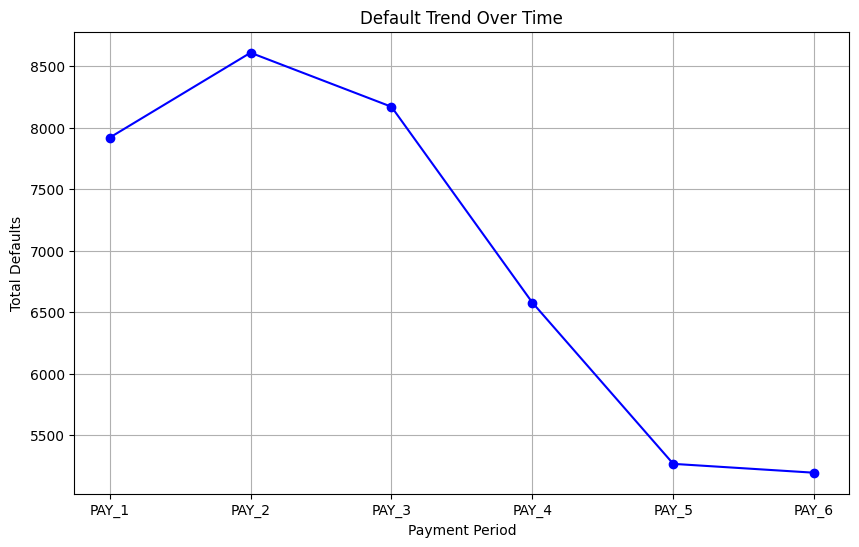

In [ ]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(default_trand.index, default_trand.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Default Trend Over Time')
plt.xlabel('Payment Period')
plt.ylabel('Total Defaults')

# Show the grid for better readability
plt.grid(True)

# Display the chart
plt.show()

*  Check the relation between credit limit and the default payment next month

In [25]:
def0 = df.loc[df['default payment next month'] == 0, 'LIMIT_BAL']
def1 = df.loc[df['default payment next month'] == 1, 'LIMIT_BAL']

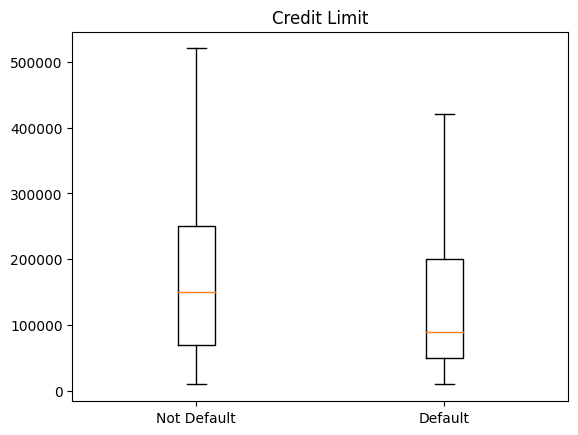

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([def0,def1], showfliers = False)
ax.set_xticklabels(['Not Default','Default'])
ax.set_title('Credit Limit')
plt.show()

In [27]:
bills = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
bills.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [28]:
bill_melt = pd.melt(bills, var_name = 'bill_cycle', value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount'] < 0]
neg_bill.groupby('bill_cycle').count()

,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


*  check who had no cunsumption in 6 month

In [29]:
bill_amt = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
no_transtion = bill_amt[bill_amt.sum(axis = 1) == 0]
no_transtion.shape
no_transtion

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
19,0,0,0,0,0,0
20,0,0,0,0,0,0
46,0,0,0,0,0,0
80,0,0,0,0,0,0
122,0,0,0,0,0,0
...,...,...,...,...,...,...
29909,0,0,0,0,0,0
29910,0,0,0,0,0,0
29974,0,0,0,0,0,0


## Pairplot

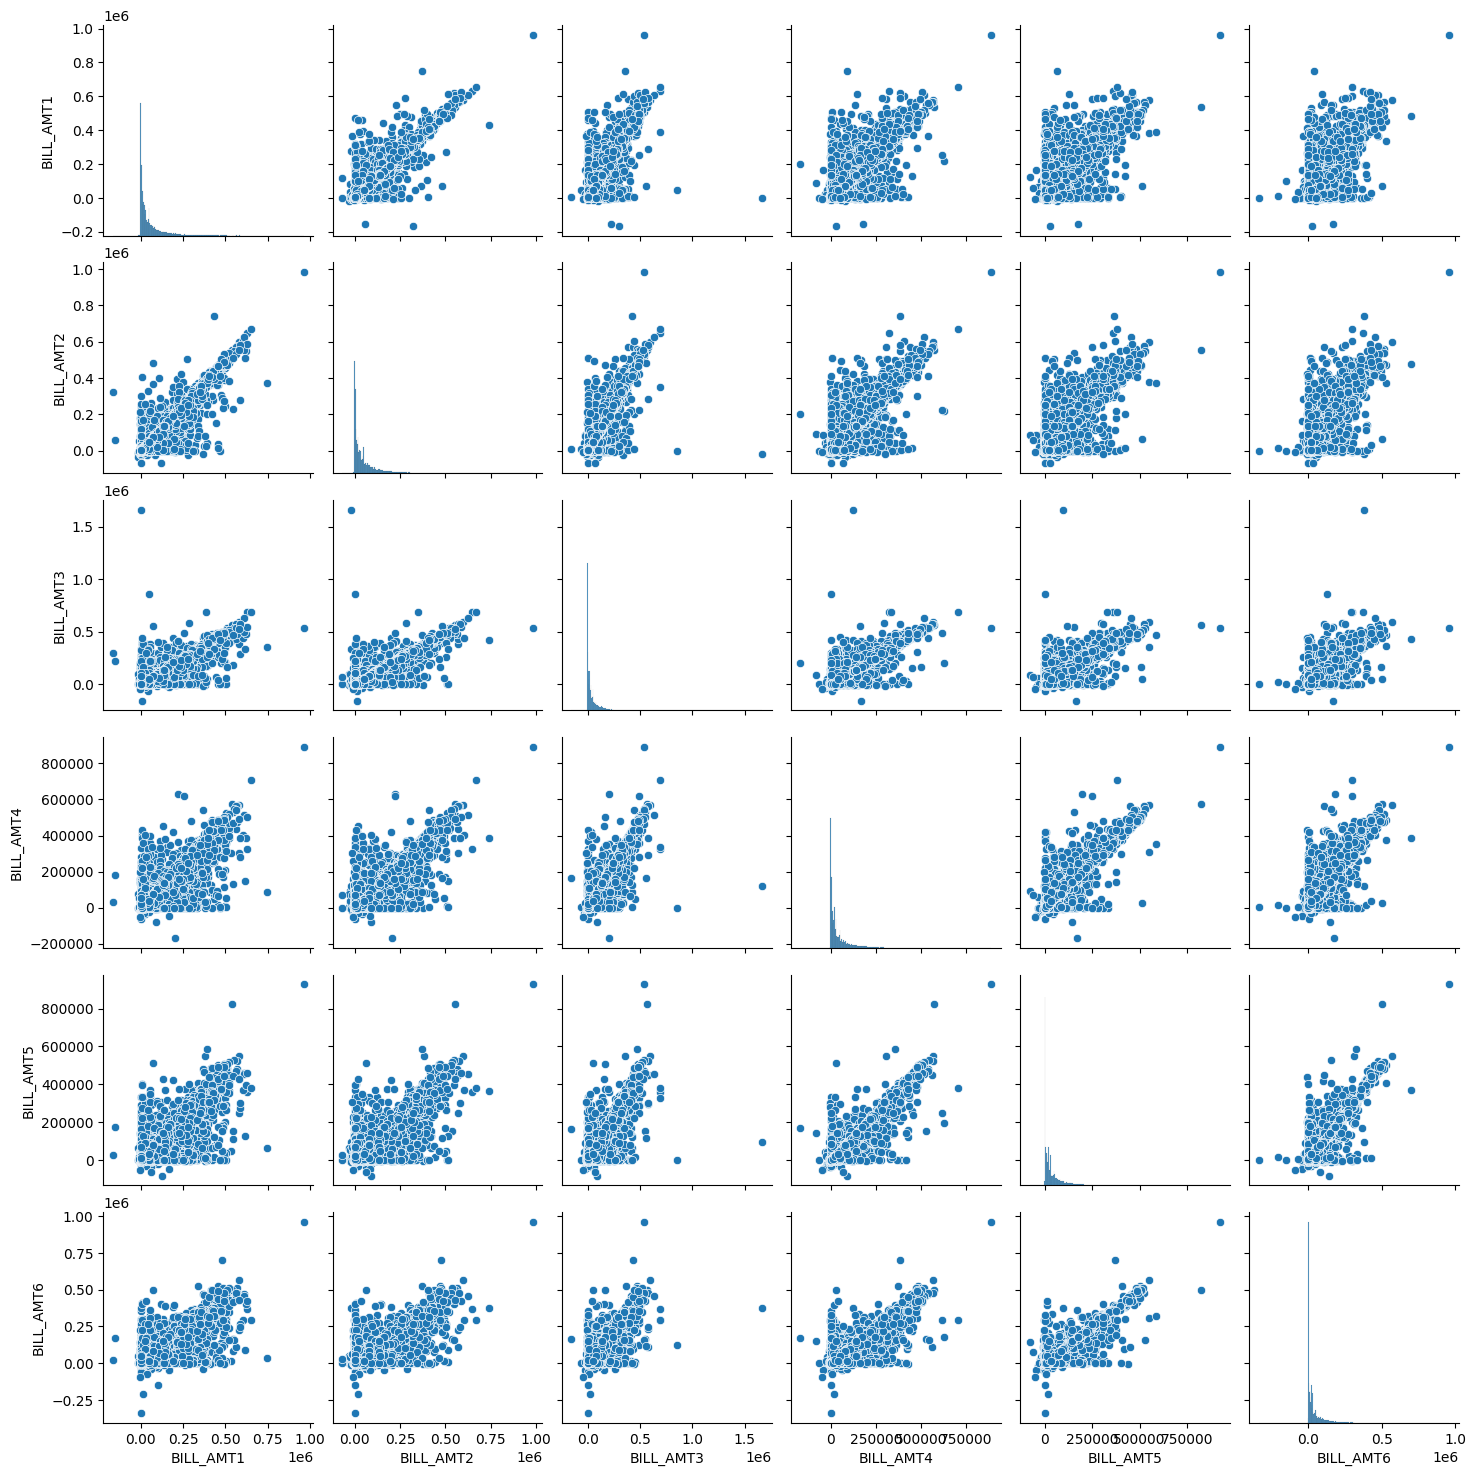

In [ ]:
sns.pairplot(df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
plt.show()

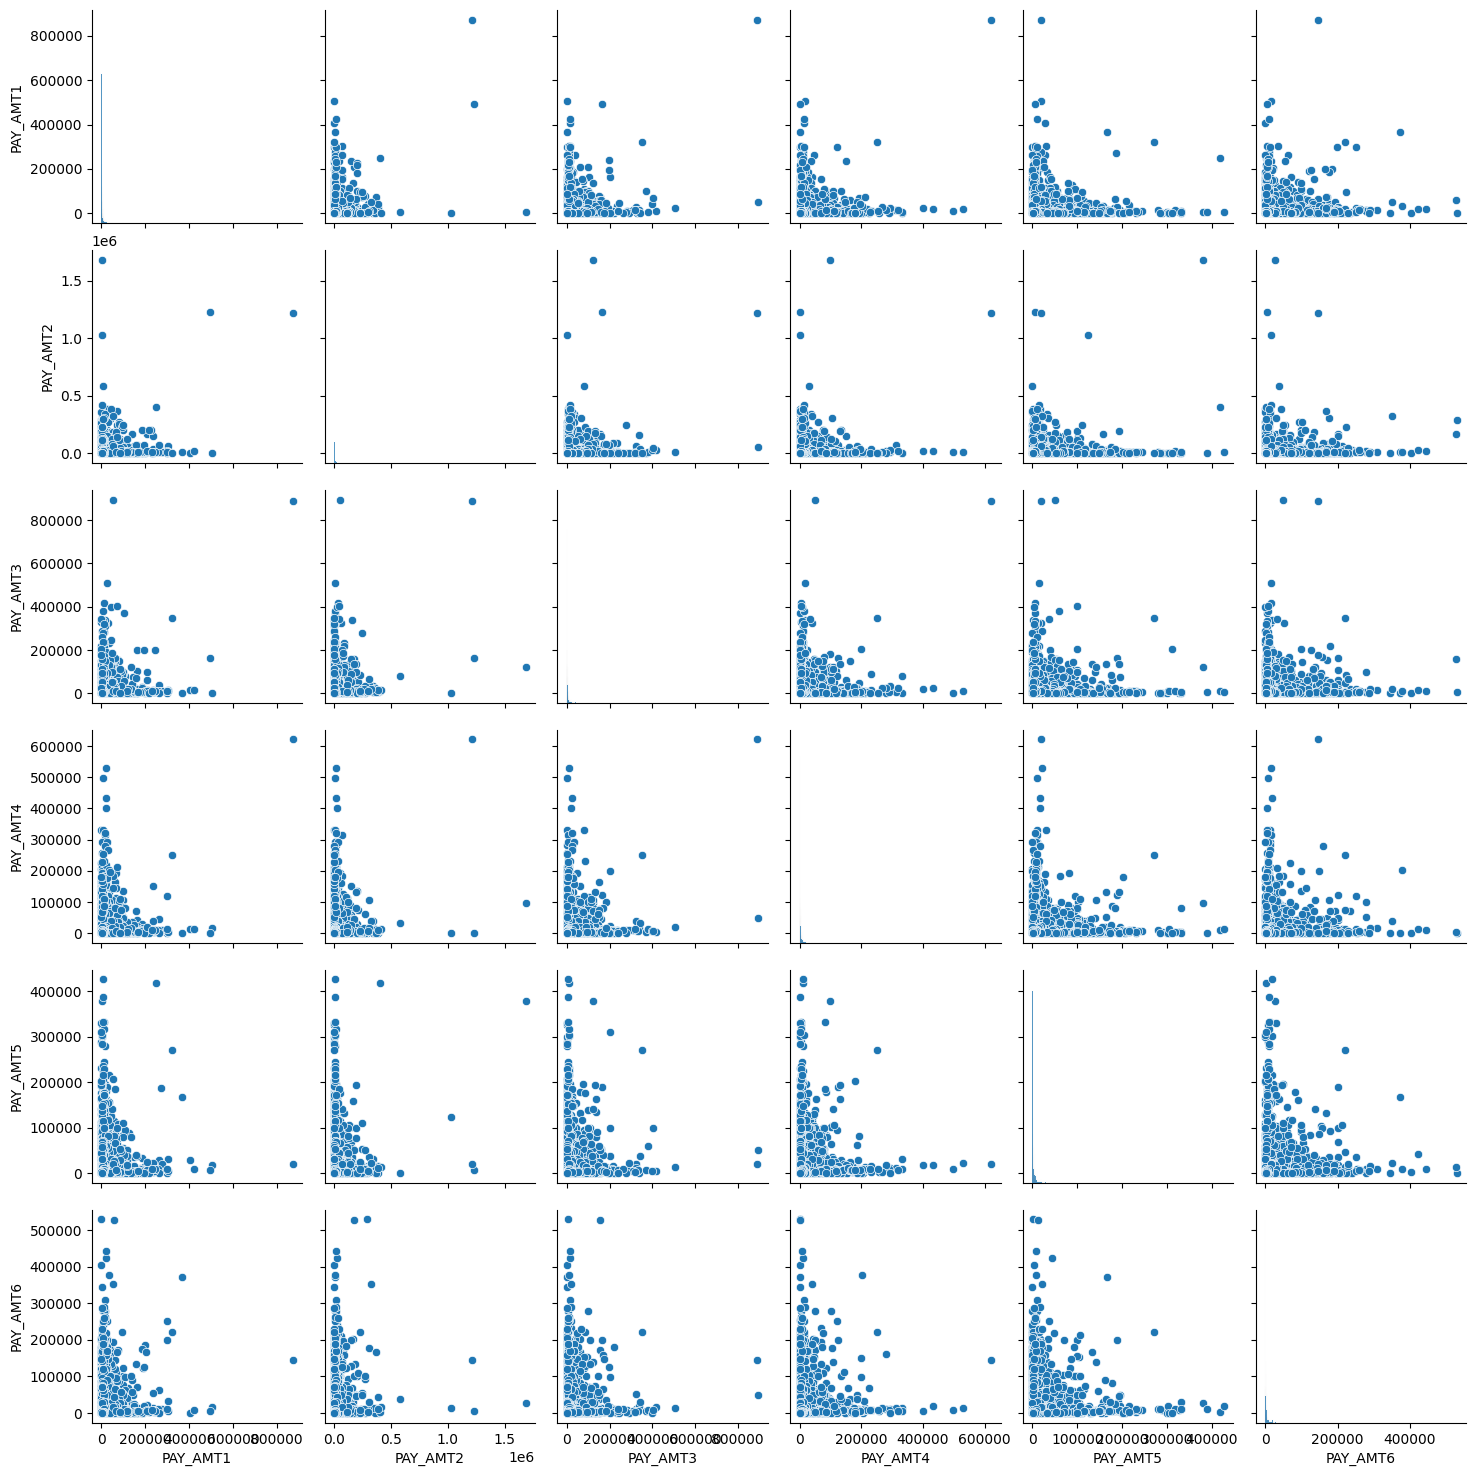

In [ ]:
sns.pairplot(df[['PAY_AMT1', 'PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])
plt.show()

## Correlation Matrix

In [30]:
df = df.drop('HAS_DEF',axis = 1)

In [ ]:
int_columns_df = df.select_dtypes(include = ['int','float'])
int_columns_df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: >

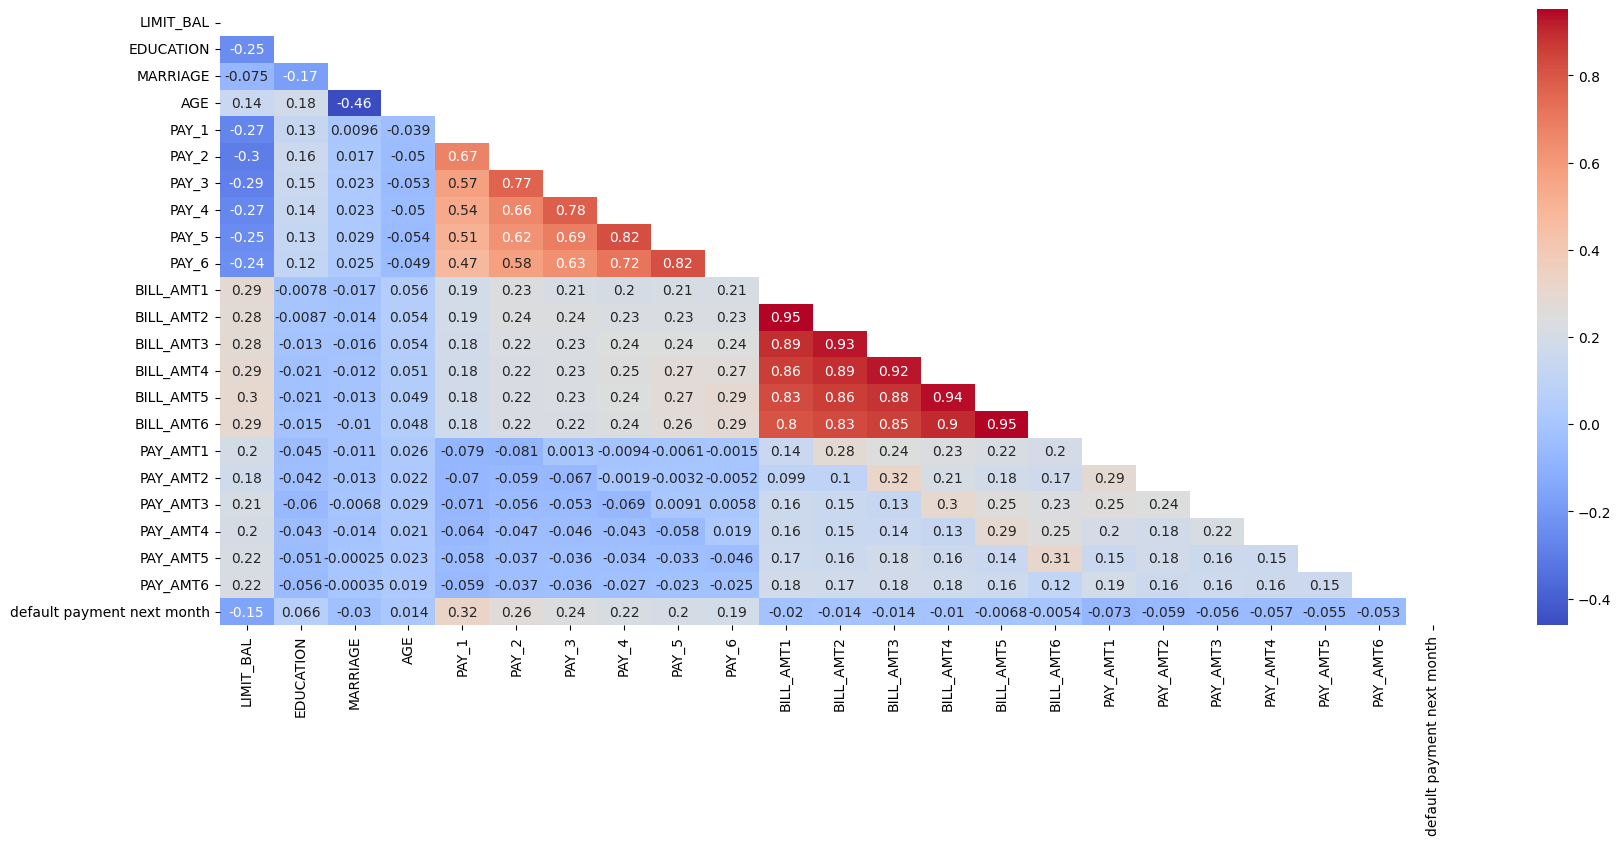

In [ ]:
plt.figure(figsize = (20,8))
correlatin = int_columns_df.corr()
mask = np.triu(np.ones_like(int_columns_df.corr()))
sns.heatmap(correlatin, mask = mask, annot = True, cmap = 'coolwarm')

## Prepare for modeling

.Feature Engineering

In [31]:
bins = [21,30,40,50,60,70,80]
labels = list(range(6))
df['AGE'] = pd.cut(df['AGE'],bins = bins, labels = labels, right = False)
df.AGE = df.AGE.cat.codes

In [ ]:
df['AGE']

,AGE
ID,
1,0
2,0
3,1
4,1
5,3
...,...
29996,1
29997,2
29998,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  int64   
 3   MARRIAGE                    30000 non-null  int64   
 4   AGE                         30000 non-null  int8    
 5   PAY_1                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3            

## One Hot Encoding

In [32]:
df['SEX'] = df['SEX'].map({'Male':1,'Female':0})
df['SEX'] = df['SEX'].astype(int)
df['SEX'].value_counts()

,count
SEX,
0,18112
1,11888


## Check Class Imbalance

In [33]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


## feature selection

In [34]:
x = df.drop('default payment next month', axis=1)
y = df['default payment next month']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## LogisticRegression Without handle inblance data

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

y_proba = lr.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, predictions))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score :", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

ROC AUC Score : 0.7261421822542005


## handle inblanced data

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
new_df = df.copy()

In [ ]:
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

In [ ]:
# Applying SMOTE

smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

y.value_counts()

,count
default payment next month,
1,23364
0,23364


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## LogisticRegression  handle with inblance data

In [ ]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

y_proba = lr.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, predictions))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      4664
           1       0.72      0.69      0.70      4682

    accuracy                           0.71      9346
   macro avg       0.71      0.71      0.71      9346
weighted avg       0.71      0.71      0.71      9346

ROC AUC Score (SMOTE): 0.7763857906598974


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


## RandomForestClassifier

In [41]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 720)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_test)


y_proba = clf.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, y_pred))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4664
           1       0.86      0.83      0.85      4682

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346

ROC AUC Score (SMOTE): 0.9189302641113772
ACCURACY OF THE MODEL: 0.8496683072972394


### GradientBoostingClassifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a GBC classifier
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=42)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
gbc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = gbc.predict(x_test)


y_proba = gbc.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, y_pred))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      4664
           1       0.78      0.72      0.75      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346

ROC AUC Score (SMOTE): 0.8263115858112856
ACCURACY OF THE MODEL: 0.7563663599400813


### KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a KNN classifier
knn = KNeighborsClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
knn.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = knn.predict(x_test)


y_proba = knn.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, y_pred))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      4664
           1       0.75      0.78      0.76      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346

ROC AUC Score (SMOTE): 0.8239764731613279
ACCURACY OF THE MODEL: 0.7570083458163921


## Support vector

In [48]:
from sklearn.svm import SVC

In [50]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a SVC classifier
svc = SVC(gamma='auto')

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
svc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = svc.predict(x_test)


# print classification report
print(classification_report(y_test, y_pred))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      4664
           1       0.78      0.72      0.75      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346

ACCURACY OF THE MODEL: 0.7559383693558742


### ExtraTreesClassifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a ETC classifier
etc = ExtraTreesClassifier(n_estimators=500,
                            random_state=2,
                            max_features=0.75,
                            max_depth=15)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
etc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = etc.predict(x_test)


y_proba = etc.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, y_pred))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4664
           1       0.82      0.75      0.78      4682

    accuracy                           0.79      9346
   macro avg       0.79      0.79      0.79      9346
weighted avg       0.80      0.79      0.79      9346

ROC AUC Score (SMOTE): 0.8707974246099986
ACCURACY OF THE MODEL: 0.7927455595976889


### AdaBoostClassifier


In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a ADBC classifier
abc = AdaBoostClassifier(n_estimators=500, learning_rate=.01)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
abc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = abc.predict(x_test)


y_proba = abc.predict_proba(x_test)[:,1]

# print classification report
print(classification_report(y_test, y_pred))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (SMOTE):", roc_auc_score(y_test, y_proba))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      4664
           1       0.78      0.62      0.69      4682

    accuracy                           0.72      9346
   macro avg       0.73      0.72      0.72      9346
weighted avg       0.73      0.72      0.72      9346

ROC AUC Score (SMOTE): 0.7896897711611126
ACCURACY OF THE MODEL: 0.7196661673443184


## VotingClassifier


In [56]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [58]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 720)

# creating a ADBC classifier
abc = AdaBoostClassifier(n_estimators=500, learning_rate=.01)

# creating a EXT classifier
etc = ExtraTreesClassifier(n_estimators=500,
                            random_state=2,
                            max_features=0.75,
                            max_depth=15)

# creating a svc classifier
svc = SVC(gamma='auto')

# creating a KNN classifier
knn = KNeighborsClassifier()

# creating a GBC classifier
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=42)

vc = VotingClassifier([('clf', clf), ('abc', abc), ('etc',etc), ('svc',svc), ('knn', knn), ('gbc', gbc)], voting='hard')

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
vc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = vc.predict(x_test)

# print classification report
print(classification_report(y_test, y_pred))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      4664
           1       0.83      0.72      0.77      4682

    accuracy                           0.78      9346
   macro avg       0.79      0.78      0.78      9346
weighted avg       0.79      0.78      0.78      9346

ACCURACY OF THE MODEL: 0.7847207361438049


### StackingClassifier


In [60]:
from sklearn.ensemble import StackingClassifier

In [61]:
# Feature selections
x = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# inblanced data handle using SMOTE
smote = SMOTE(sampling_strategy='auto')
x, y = smote.fit_resample(x, y)

#feature extractions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#data Scaling
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Create Estimator on Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=42)),
    ('xgb', AdaBoostClassifier(n_estimators=500, learning_rate=.01))
]

stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
stc.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = stc.predict(x_test)

# print classification report
print(classification_report(y_test, y_pred))

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4664
           1       0.83      0.79      0.81      4682

    accuracy                           0.81      9346
   macro avg       0.82      0.81      0.81      9346
weighted avg       0.82      0.81      0.81      9346

ACCURACY OF THE MODEL: 0.814252086454098


## Model Extraction

In [62]:
import pickle

### Random forest model accurecy is best for another model 91%

In [63]:
pickle.dump(clf, open('rmdfc.pkl', 'wb'))